# 二十三.傅里叶变换之高通滤波和低通滤波

1.高通滤波

2.低通滤波

3.本章小结


## 23.1.高通滤波

傅里叶变换的目的并不是为了观察图像的频率分布（至少不是最终目的），更多情况下是为了对频率进行过滤，通过修改频率以达到图像增强、图像去噪、边缘检测、特征提取、压缩加密等目的。过滤的方法一般有三种：低通（Low-pass）、高通（High-pass）、带通（Band-pass）。所谓低通就是保留图像中的低频成分，过滤高频成分，可以把过滤器想象成一张渔网，想要低通过滤器，就是将高频区域的信号全部拉黑，而低频区域全部保留。例如，在一幅大草原的图像中，低频对应着广袤且颜色趋于一致的草原，表示图像变换缓慢的灰度分量；高频对应着草原图像中的老虎等边缘信息，表示图像变换较快的灰度分量，由于灰度尖锐过度造成高通滤波器是指通过高频的滤波器，衰减低频而通过高频，常用于增强尖锐的细节，但会导致图像的对比度会降低。


该滤波器将检测图像的某个区域，根据像素与周围像素的差值来提升像素的亮度。图展示了“Lena”图对应的频谱图像，其中心区域为低频部分。


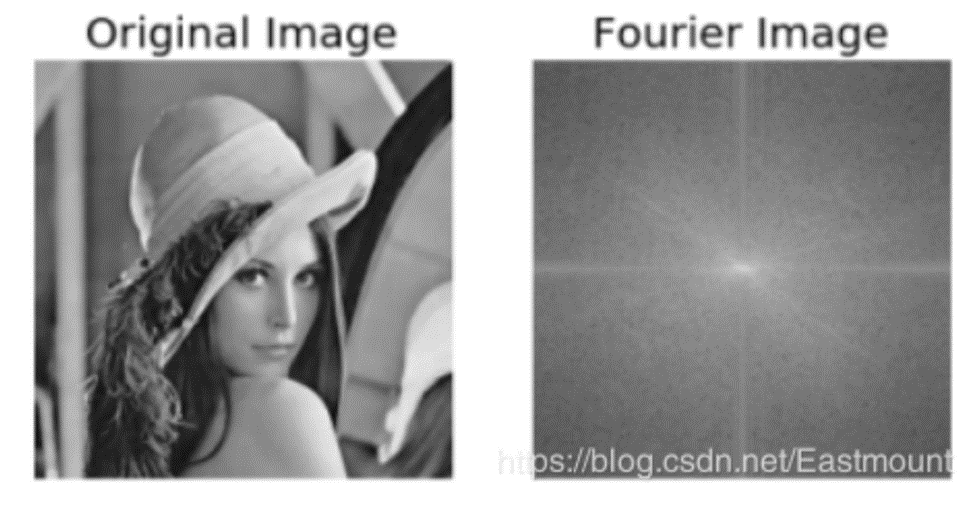

接着通过高通滤波器覆盖掉中心低频部分，将255两点变换为0，同时保留高频部分，其处理过程如下图所示。


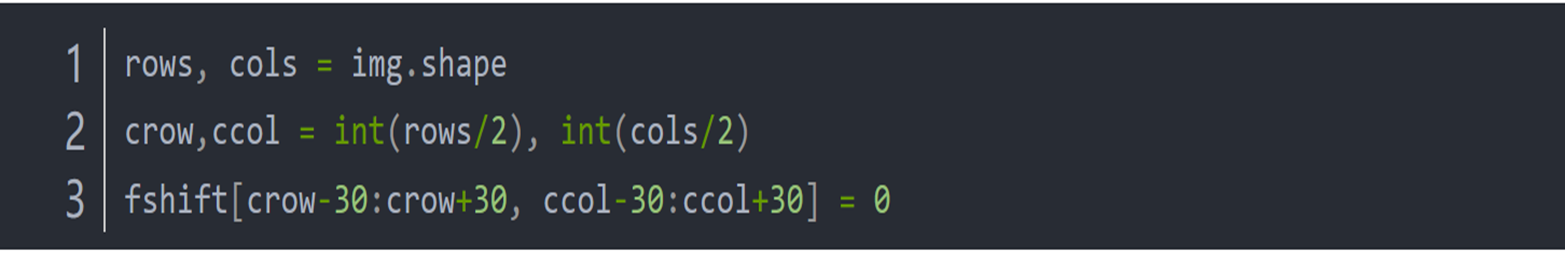

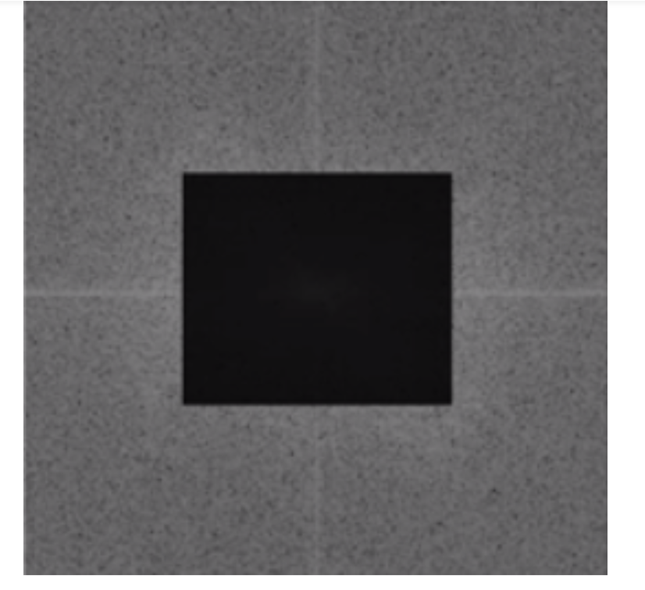

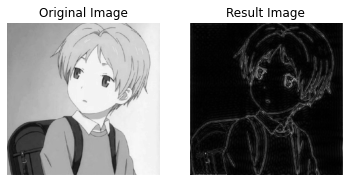

In [3]:
# -*- coding: utf-8 -*-
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#读取图像
img = cv.imread('test.jpg', 0)

#傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

#设置高通滤波器
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

#傅里叶逆变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

#显示原始图像和高通滤波处理图像
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(122), plt.imshow(iimg, 'gray'), plt.title('Result Image')
plt.axis('off')
plt.show()



通过高通滤波器将提取图像的边缘轮廓，生成如上图所示图像。


输出结果如下图所示，第一幅图为原始“Lena”图，第二幅图为高通滤波器提取的边缘轮廓图像。它通过傅里叶变换转换为频谱图像，再将中心的低频部分设置为0，再通过傅里叶逆变换转换为最终输出图像“Result Image”。


## 23.2.低通滤波

低通滤波器是指通过低频的滤波器，衰减高频而通过低频，常用于模糊图像。低通滤波器与高通滤波器相反，当一个像素与周围像素的插值小于一个特定值时，平滑该像素的亮度，常用于去燥和模糊化处理。如PS软件中的高斯模糊，就是常见的模糊滤波器之一，属于削弱高频信号的低通滤波器。下图展示了“Lena”图对应的频谱图像，其中心区域为低频部分。如果构造低通滤波器，则将频谱图像中心低频部分保留，其他部分替换为黑色0，其处理过程如图所示，最终得到的效果图为模糊图像。


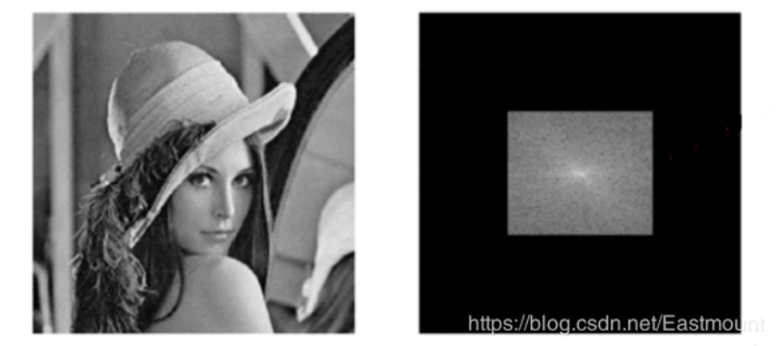

那么，如何构造该滤波图像呢？如下图所示，滤波图像是通过低通滤波器和频谱图像形成。其中低通滤波器中心区域为白色255，其他区域为黑色0。


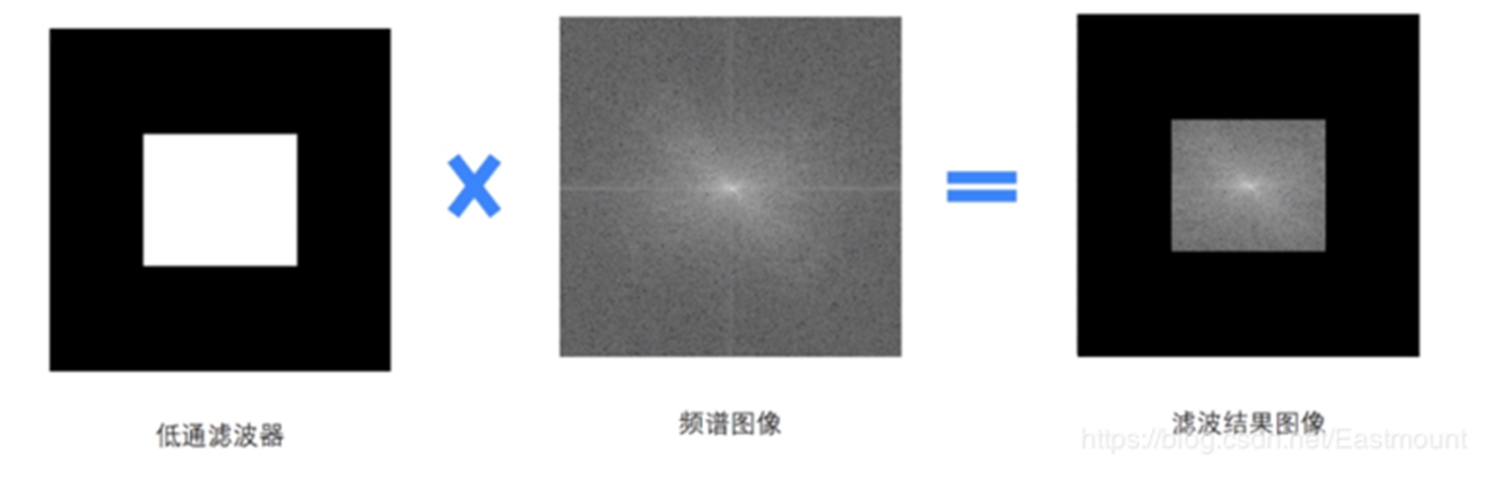

低通滤波器主要通过矩阵设置构造，其核心代码如下：


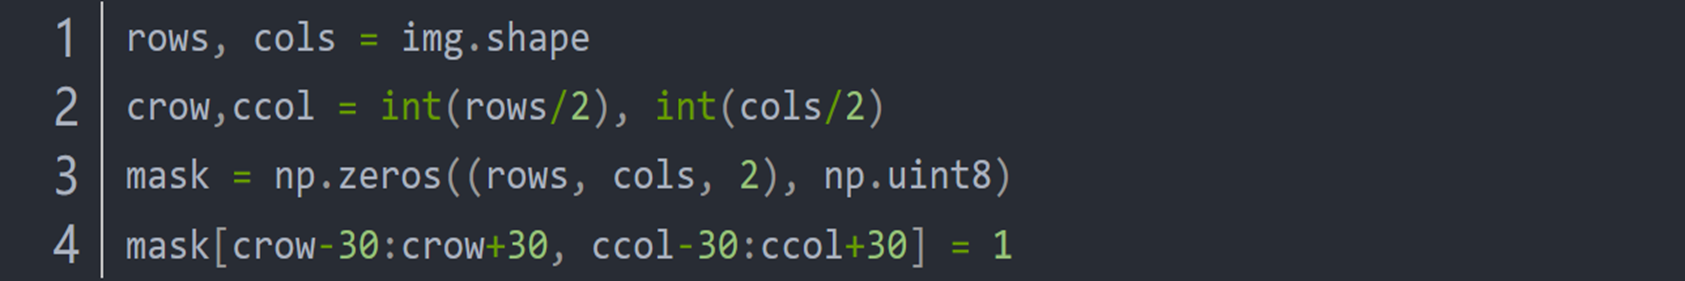

通过低通滤波器将模糊图像的完整代码如下所示：


(400, 400, 2) (400, 400, 2) (400, 400, 2)


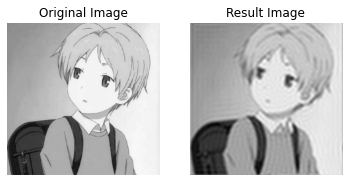

In [6]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

#读取图像
img = cv2.imread('test.jpg', 0)

#傅里叶变换
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)

#设置低通滤波器
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2) #中心位置
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

#掩膜图像和频谱图像乘积
f = fshift * mask
print(f.shape, fshift.shape, mask.shape)


#傅里叶逆变换
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])

#显示原始图像和低通滤波处理图像
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray'), plt.title('Result Image')
plt.axis('off')
plt.show()



输出结果如图所示，第一幅图为原图，第二幅图为低通滤波器模糊处理后的图像。
